Text(0, 0.5, '$\\epsilon$ / deg')

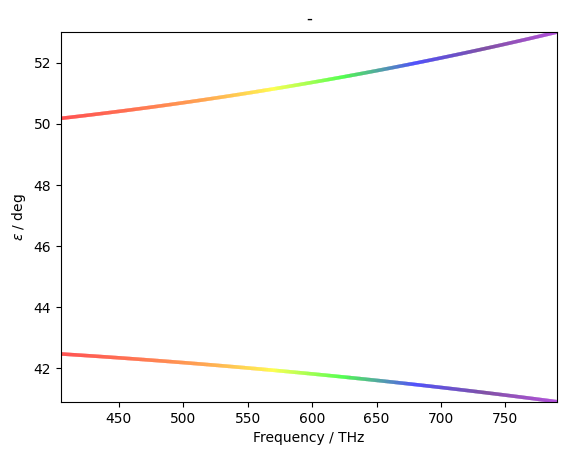

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.collections import LineCollection
from matplotlib.colors import LinearSegmentedColormap

rainbow = [(1,0,0),(1,0.2,0),(1,0.5,0),(1,1,0),(0,1,0),(0,0,1),(0.29,0,0.51),(0.58,0,0.83)]
colourmap = LinearSegmentedColormap.from_list('colours', rainbow)

frequency = np.linspace(405, 790, 10000)
RefractiveIndex = (1 + ((1 / (1.731 - 0.261*((frequency / 1000)**2))) ** 0.5)) ** 0.5
Theta1 = np.arcsin(((4-RefractiveIndex**2)/3)**0.5)
Theta2 = np.arcsin(((9-RefractiveIndex**2)/8)**0.5)
Epsilon1 = 4*np.arcsin(np.sin(Theta1)/RefractiveIndex) - 2*Theta1
Epsilon2 = np.pi - 6*np.arcsin(np.sin(Theta2)/RefractiveIndex) + 2*Theta2
Epsilon1, Epsilon2 = np.rad2deg(Epsilon1), np.rad2deg(Epsilon2)

points1 = np.array([frequency, Epsilon1]).T.reshape(-1, 1, 2)
points2 = np.array([frequency, Epsilon2]).T.reshape(-1, 1, 2)
lines1 = np.concatenate([points1[:-1], points1[1:]], axis=1)
lines2 = np.concatenate([points2[:-1], points2[1:]], axis=1)
ColourLines1 = LineCollection(lines1, cmap=colourmap, linewidth=2.5)
ColourLines2 = LineCollection(lines2, cmap=colourmap, linewidth=2.5)
ColourLines1.set_array(frequency)
ColourLines2.set_array(frequency)

fig, ax = plt.subplots()
ColourLines1 = ax.add_collection(ColourLines1)
ColourLines2 = ax.add_collection(ColourLines2)
ax.set_xlim(405, 790)
ax.set_ylim(Epsilon1.min(), Epsilon2.max())

plt.title("Elevation of single and double rainbows")
plt.xlabel('Frequency / THz')
plt.ylabel('$\epsilon$ / deg')